In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
#!wget https://raw.githubusercontent.com/zgywyww/Federal-Reserve-Sentiment/main/full_df.csv
#!wget https://raw.githubusercontent.com/zgywyww/Federal-Reserve-Sentiment/main/federal_reserve_speeches_1996_2023.csv
#!wget https://raw.githubusercontent.com/zgywyww/Federal-Reserve-Sentiment/main/Fed_Minutes_1996_2023.csv

meta = pd.read_csv('github_data/full_df.csv')
meta = meta.drop(columns='Unnamed: 0')
meta.head()
!wget https://raw.githubusercontent.com/zgywyww/Federal-Reserve-Sentiment/main/federal_reserve_statement_1999_2023.csv
stmt = pd.read_csv('github_data/federal_reserve_statement_1999_2023.csv')
stmt.head()
meta['GDPC1']=meta['GDPC1'].fillna(method='ffill')
meta['GDPPOT']=meta['GDPPOT'].fillna(method='ffill')
meta['GDPC1_month']=meta['GDPC1_month'].fillna(method='ffill')
meta['GDPC1_year']=meta['GDPC1_year'].fillna(method='ffill')

meta['target_upper'] = meta['target_upper'].fillna(meta['target_lower'])
meta.head()

zsh:1: command not found: wget


/var/folders/8m/l0zwzjlx039b9b96c4gdw3sm0000gn/T/ipykernel_10530/567287751.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  meta['GDPC1']=meta['GDPC1'].fillna(method='ffill')
/var/folders/8m/l0zwzjlx039b9b96c4gdw3sm0000gn/T/ipykernel_10530/567287751.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  meta['GDPPOT']=meta['GDPPOT'].fillna(method='ffill')
/var/folders/8m/l0zwzjlx039b9b96c4gdw3sm0000gn/T/ipykernel_10530/567287751.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  meta['GDPC1_month']=meta['GDPC1_month'].fillna(method='ffill')
/var/folders/8m/l0zwzjlx039b9b96c4gdw3sm0000gn/T/ipykernel_10530/567287751.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj

,date,effective_rate,FEDFUNDS,GDPC1,UNRATE,MEDCPIM158SFRBCLE,RSAFS,UMCSENT,target_lower,target_upper,...,RSAFS_year,UMCSENT_year,FEDFUNDS_month,GDPC1_month,UNRATE_month,MEDCPIM158SFRBCLE_month,RSAFS_month,UMCSENT_month,GDPPOT,UNRATE_health
0,1996-01-01,7.03,5.56,11614.418,5.6,3.775768,208699.0,89.3,6.5,6.5,...,3.53520,-8.50410,-0.71429,0.74905,0.00000,46.36763,-0.80799,-1.86813,10879.309158,-0.364854
1,1996-02-01,7.03,5.22,11614.418,5.5,2.618961,212008.0,88.5,6.5,6.5,...,6.85941,-6.94006,-6.11511,0.74905,-1.78571,-30.63766,1.58554,-0.89586,10879.309158,-0.304166
2,1996-03-01,7.03,5.31,11614.418,5.5,3.110565,213891.0,93.7,6.5,6.5,...,6.81359,3.76523,1.72414,0.74905,0.00000,18.77096,0.88817,5.87571,10879.309158,-0.304166
3,1996-04-01,7.03,5.22,11808.140,5.6,3.133276,214676.0,92.7,6.5,6.5,...,6.78698,0.21622,-1.69492,1.66794,1.81818,0.73012,0.36701,-1.06724,10961.169453,-0.364854
4,1996-05-01,7.03,5.24,11808.140,5.6,2.937790,216299.0,89.4,6.5,6.5,...,6.55858,-0.44543,0.38314,1.66794,0.00000,-6.23902,0.75602,-3.55987,10961.169453,-0.364854


In [5]:
speech = pd.read_csv('github_data/federal_reserve_speeches_1996_2023.csv')
minute = pd.read_csv('github_data/Fed_Minutes_1996_2023.csv')

In [6]:
import re
#len(re.sub(' +',' ',minute.iloc[1,1]).split(' '))
minute['min_text'] = minute.pop('Federal_Reserve_Mins').apply(lambda x: re.sub(' +',' ',x))
minute['min_len'] = [len(ii.split(' ')) for ii in minute['min_text']]
minute['Unnamed: 0'] = pd.to_datetime(minute['Unnamed: 0'])
minute.rename(columns={'Unnamed: 0': 'date'}, inplace = True)
minute.head()

,date,min_text,min_len
0,1996-01-30,"The Federal Reserve, the central bank of the U...",7567
1,1996-03-26,A meeting of the Federal Open Market Committee...,25005
2,1996-05-21,A meeting of the Federal Open Market Committee...,27859
3,1996-07-02,A meeting of the Federal Open Market Committee...,33065
4,1996-08-20,A meeting of the Federal Open Market Committee...,33866


In [7]:
# edit meta data
meta['date'] = pd.to_datetime(meta['date'], format='%Y-%m-%d')
meta = meta[meta['date'].dt.year >= 1999]
meta.head()

,date,effective_rate,FEDFUNDS,GDPC1,UNRATE,MEDCPIM158SFRBCLE,RSAFS,UMCSENT,target_lower,target_upper,...,RSAFS_year,UMCSENT_year,FEDFUNDS_month,GDPC1_month,UNRATE_month,MEDCPIM158SFRBCLE_month,RSAFS_month,UMCSENT_month,GDPPOT,UNRATE_health
36,1999-01-01,7.03,4.63,13315.597,4.3,1.549172,246868.0,103.9,6.5,6.5,...,6.59838,-2.53283,-1.06838,0.93943,-2.27273,-22.29541,0.13710,3.38308,12149.437434,0.336839
37,1999-02-01,7.03,4.76,13315.597,4.4,1.740411,249520.0,108.1,6.5,6.5,...,7.69842,-2.08333,2.80778,0.93943,2.32558,12.34457,1.07426,4.04235,12149.437434,0.289100
38,1999-03-01,7.03,4.81,13315.597,4.2,1.842621,250667.0,105.7,6.5,6.5,...,7.54409,-0.75117,1.05042,0.93943,-4.54545,5.87276,0.45968,-2.22017,12149.437434,0.383633
39,1999-04-01,7.03,4.74,13426.748,4.3,2.675990,252477.0,104.6,6.5,6.5,...,6.98813,-3.77185,-1.45530,0.83474,2.38095,45.22741,0.72207,-1.04068,12293.893434,0.336839
40,1999-05-01,7.03,4.74,13426.748,4.2,1.715177,254735.0,106.8,6.5,6.5,...,7.44912,0.28169,0.00000,0.83474,-2.32558,-35.90495,0.89434,2.10325,12293.893434,0.383633


In [8]:
# edit statement data
stmt['date'] = pd.to_datetime(stmt['date'])
stmt.insert(0,'date', stmt.pop('date'))
stmt.head()

,date,link,title,speaker,event,year,text,text_len,location,decision
0,1999-05-18,https://www.federalreserve.gov/boarddocs/press...,Federal Reserve issues FOMC statement,NaN,NaN,1999,For immediate releaseThe Federal Reserve relea...,164,NaN,0
1,1999-06-30,https://www.federalreserve.gov/boarddocs/press...,Federal Reserve issues FOMC statement,NaN,NaN,1999,For immediate release\tThe Federal Open Market...,172,NaN,1
2,1999-08-24,https://www.federalreserve.gov/boarddocs/press...,Federal Reserve issues FOMC statement,NaN,NaN,1999,For immediate releaseThe Federal Open Market C...,227,NaN,1
3,1999-10-05,https://www.federalreserve.gov/boarddocs/press...,Federal Reserve issues FOMC statement,NaN,NaN,1999,For immediate releaseThe Federal Open Market C...,181,NaN,0
4,1999-11-16,https://www.federalreserve.gov/boarddocs/press...,Federal Reserve issues FOMC statement,NaN,NaN,1999,For immediate release\tThe Federal Open Market...,252,NaN,1


In [9]:
minute_stmt = pd.merge_asof(minute, stmt, on ='date', direction='backward')
minute_stmt.loc[minute_stmt['date'] > pd.to_datetime('2000-01-01')].head(2)

,date,min_text,min_len,link,title,speaker,event,year,text,text_len,location,decision
32,2000-02-02,A meeting of the Federal Open Market Committee...,95193,https://www.federalreserve.gov/boarddocs/press...,Federal Reserve issues FOMC statement,NaN,NaN,2000.0,For immediate releaseThe Federal Open Market C...,202.0,NaN,1.0
33,2000-03-21,A meeting of the Federal Open Market Committee...,92488,https://www.federalreserve.gov/boarddocs/press...,Federal Reserve issues FOMC statement,NaN,NaN,2000.0,For immediate releaseThe Federal Open Market C...,208.0,NaN,1.0


In [10]:
minute_stmt['concat_text'] = minute_stmt['min_text'] + minute_stmt['text'].apply(lambda x: x if type(x) == 'str' else '')
minute_stmt['concat_text']

0      The Federal Reserve, the central bank of the U...
1      A meeting of the Federal Open Market Committee...
2      A meeting of the Federal Open Market Committee...
3      A meeting of the Federal Open Market Committee...
4      A meeting of the Federal Open Market Committee...
                             ...                        
217    The Federal Reserve, the central bank of the U...
218    The Federal Reserve, the central bank of the U...
219    The Federal Reserve, the central bank of the U...
220    The Federal Reserve, the central bank of the U...
221    The Federal Reserve, the central bank of the U...
Name: concat_text, Length: 222, dtype: object

In [11]:
df = pd.merge_asof(meta, minute_stmt[['date','concat_text','decision']], on = 'date', direction='forward')
df.head()

,date,effective_rate,FEDFUNDS,GDPC1,UNRATE,MEDCPIM158SFRBCLE,RSAFS,UMCSENT,target_lower,target_upper,...,FEDFUNDS_month,GDPC1_month,UNRATE_month,MEDCPIM158SFRBCLE_month,RSAFS_month,UMCSENT_month,GDPPOT,UNRATE_health,concat_text,decision
0,1999-01-01,7.03,4.63,13315.597,4.3,1.549172,246868.0,103.9,6.5,6.5,...,-1.06838,0.93943,-2.27273,-22.29541,0.13710,3.38308,12149.437434,0.336839,A meeting of the Federal Open Market Committee...,NaN
1,1999-02-01,7.03,4.76,13315.597,4.4,1.740411,249520.0,108.1,6.5,6.5,...,2.80778,0.93943,2.32558,12.34457,1.07426,4.04235,12149.437434,0.289100,A meeting of the Federal Open Market Committee...,NaN
2,1999-03-01,7.03,4.81,13315.597,4.2,1.842621,250667.0,105.7,6.5,6.5,...,1.05042,0.93943,-4.54545,5.87276,0.45968,-2.22017,12149.437434,0.383633,A meeting of the Federal Open Market Committee...,NaN
3,1999-04-01,7.03,4.74,13426.748,4.3,2.675990,252477.0,104.6,6.5,6.5,...,-1.45530,0.83474,2.38095,45.22741,0.72207,-1.04068,12293.893434,0.336839,A meeting of the Federal Open Market Committee...,0.0
4,1999-05-01,7.03,4.74,13426.748,4.2,1.715177,254735.0,106.8,6.5,6.5,...,0.00000,0.83474,-2.32558,-35.90495,0.89434,2.10325,12293.893434,0.383633,A meeting of the Federal Open Market Committee...,0.0


In [12]:
df = df.iloc[3:,:].reset_index(drop=True)
df

,date,effective_rate,FEDFUNDS,GDPC1,UNRATE,MEDCPIM158SFRBCLE,RSAFS,UMCSENT,target_lower,target_upper,...,FEDFUNDS_month,GDPC1_month,UNRATE_month,MEDCPIM158SFRBCLE_month,RSAFS_month,UMCSENT_month,GDPPOT,UNRATE_health,concat_text,decision
0,1999-04-01,7.03,4.74,13426.748,4.3,2.675990,252477.0,104.6,6.50,6.50,...,-1.45530,0.83474,2.38095,45.22741,0.72207,-1.04068,12293.893434,0.336839,A meeting of the Federal Open Market Committee...,0.0
1,1999-05-01,7.03,4.74,13426.748,4.2,1.715177,254735.0,106.8,6.50,6.50,...,0.00000,0.83474,-2.32558,-35.90495,0.89434,2.10325,12293.893434,0.383633,A meeting of the Federal Open Market Committee...,0.0
2,1999-06-01,7.03,4.76,13426.748,4.3,1.182845,255449.0,107.3,6.50,6.50,...,0.42194,0.83474,2.38095,-31.03661,0.28029,0.46816,12293.893434,0.336839,A meeting of the Federal Open Market Committee...,0.0
3,1999-07-01,7.03,4.99,13604.771,4.3,2.393707,257456.0,106.0,6.50,6.50,...,4.83193,1.32588,0.00000,102.36867,0.78568,-1.21156,12445.487326,0.336839,A meeting of the Federal Open Market Committee...,1.0
4,1999-08-01,7.03,5.07,13604.771,4.2,2.361582,260230.0,104.5,6.50,6.50,...,1.60321,1.32588,-2.32558,-1.34204,1.07747,-1.41509,12445.487326,0.383633,A meeting of the Federal Open Market Committee...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,2023-06-01,5.08,5.08,22225.350,3.6,4.355447,690518.0,64.2,5.00,5.25,...,0.39526,0.51112,-2.70270,-6.44887,0.19734,8.81356,20511.890000,0.645567,"The Federal Reserve, the central bank of the U...",1.0
291,2023-07-01,5.08,5.12,22506.365,3.5,2.283639,694415.0,71.5,5.00,5.25,...,0.78740,1.26439,-2.77778,-47.56820,0.56436,11.37072,20603.700000,0.686247,"The Federal Reserve, the central bank of the U...",0.0
292,2023-08-01,5.33,5.33,22506.365,3.8,4.027318,699540.0,69.4,5.25,5.50,...,4.10156,1.26439,8.57143,76.35525,0.73803,-2.93706,20603.700000,0.561724,"The Federal Reserve, the central bank of the U...",0.0
293,2023-09-01,5.33,5.33,22506.365,3.8,5.626580,705701.0,67.9,5.25,5.50,...,0.00000,1.26439,0.00000,39.71037,0.88072,-2.16138,20603.700000,0.561724,"The Federal Reserve, the central bank of the U...",0.0


In [13]:
import nltk
from nltk.corpus import stopwords
from textblob import Word
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /Users/yang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/yang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
def cleaning(df, stop_words):
    df['concat_text'] = df['concat_text'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
    df['concat_text'] = df['concat_text'].str.replace('[^a-zA-Z\s]', '', regex=True)
    df['concat_text'] = df['concat_text'].str.replace('\d', '', regex=True)
    df['concat_text'] = df['concat_text'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop_words))
    df['concat_text'] = df['concat_text'].apply(lambda x: ' '.join([Word(x).lemmatize() for x in x.split()]))
    return df

stop_words = stopwords.words('english')
df = cleaning(df, stop_words)
df.head()

,date,effective_rate,FEDFUNDS,GDPC1,UNRATE,MEDCPIM158SFRBCLE,RSAFS,UMCSENT,target_lower,target_upper,...,FEDFUNDS_month,GDPC1_month,UNRATE_month,MEDCPIM158SFRBCLE_month,RSAFS_month,UMCSENT_month,GDPPOT,UNRATE_health,concat_text,decision
0,1999-04-01,7.03,4.74,13426.748,4.3,2.675990,252477.0,104.6,6.5,6.5,...,-1.45530,0.83474,2.38095,45.22741,0.72207,-1.04068,12293.893434,0.336839,meeting federal open market committee held off...,0.0
1,1999-05-01,7.03,4.74,13426.748,4.2,1.715177,254735.0,106.8,6.5,6.5,...,0.00000,0.83474,-2.32558,-35.90495,0.89434,2.10325,12293.893434,0.383633,meeting federal open market committee held off...,0.0
2,1999-06-01,7.03,4.76,13426.748,4.3,1.182845,255449.0,107.3,6.5,6.5,...,0.42194,0.83474,2.38095,-31.03661,0.28029,0.46816,12293.893434,0.336839,meeting federal open market committee held off...,0.0
3,1999-07-01,7.03,4.99,13604.771,4.3,2.393707,257456.0,106.0,6.5,6.5,...,4.83193,1.32588,0.00000,102.36867,0.78568,-1.21156,12445.487326,0.336839,meeting federal open market committee held off...,1.0
4,1999-08-01,7.03,5.07,13604.771,4.2,2.361582,260230.0,104.5,6.5,6.5,...,1.60321,1.32588,-2.32558,-1.34204,1.07747,-1.41509,12445.487326,0.383633,meeting federal open market committee held off...,1.0


In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torch.nn.utils.rnn import pad_sequence
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

/Users/yang/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [23]:
def sentiments(df):
  if df['decision'] > 0.0:
    return 0
  elif df['decision'] == 0.0:
    return 1
  elif df['decision'] < 0.0:
    return 2
df['decision'] = df.apply(sentiments, axis=1)
X = df.drop(['date','decision'],axis =1).iloc[3:,:].reset_index(drop = True)
y = df.iloc[3:,:]['decision'].reset_index(drop=True)
# import train test split
from sklearn.model_selection import train_test_split
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,shuffle=False)
X_train_text = X_train['concat_text']
X_test_text = X_test['concat_text']
y_train_dummies = to_categorical(y_train, num_classes=3)
y_test_dummies = to_categorical(y_test, num_classes=3)
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    #max_features=5000,
    # min_df=10,
    # max_df=0.8,
    stop_words='english',
    norm='l2',
)
vectorizer.fit(X_train_text)
X_train_text = vectorizer.transform(X_train_text)
X_test_text = vectorizer.transform(X_test_text)
# load the vectors into PyTorch
X_train_text = torch.from_numpy(X_train_text.toarray()).long()
X_test_text = torch.from_numpy(X_test_text.toarray()).long()
y_train_dummies = torch.from_numpy(y_train.values).long()
y_test_dummies = torch.from_numpy(y_test.values).long()
# create dataloader
train_data = torch.utils.data.TensorDataset(X_train_text, y_train_dummies)
test_data = torch.utils.data.TensorDataset(X_test_text, y_test_dummies)
# dataloaders
train_data_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=False)
test_data_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False)

In [24]:
vocab_size = len(vectorizer.get_feature_names_out())
vocab_size

8135

In [25]:
class sentiment_lstm(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, num_classes):
        super(sentiment_lstm, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc1 = nn.Linear(hidden_dim, 64)
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.lstm(x)
        x = self.fc1(x[:, -1, :])
        x = self.fc2(x)
        return x

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = sentiment_lstm(vocab_size, 256, 64, 3).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [47]:
from ray import train, tune
import os
import torch

train_loader = train_data_loader
test_loader = test_data_loader

def train_sentiment(config, data_dir=None):
    checkpoint = train.get_checkpoint()
    model = sentiment_lstm(
        vocab_size=config["vocab_size"],
        embed_dim=config["embed_dim"],
        hidden_dim=config["hidden_dim"],
        num_classes=3
    ).to(device)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=config["lr"])

    if checkpoint:
        with checkpoint.as_directory() as checkpoint_dir:
            checkpoint_path = os.path.join(checkpoint_dir, "checkpoint")
            model_state, optimizer_state = torch.load(checkpoint_path)
            model.load_state_dict(model_state)
            optimizer.load_state_dict(optimizer_state)
    
   

    #patience = config["patience"]
    best_loss = float('inf')
    counter = 0

    for epoch in range(10):  # Number of epochs
        # Training phase
        model.train()
        train_loss = 0.0
        patience = 3
        correct = 0
        total = 0
        for texts, labels in train_loader:
            texts, labels = texts.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(texts)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for texts, labels in test_loader:
                texts, labels = texts.to(device), labels.to(device)
                outputs = model(texts)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
        
        train_accuracy = correct / total
        val_accuracy = val_correct / val_total
        avg_train_loss = train_loss / len(train_loader)
        avg_val_loss = val_loss / len(test_loader)

        train.report({"mean_accuracy": avg_val_loss})
        
        # Implement early stopping
        if avg_val_loss < best_loss:
            best_loss = avg_val_loss
            counter = 0
        else:
            counter += 1
            if counter >= patience:
                break  # Stop early


config = {
    "vocab_size": tune.grid_search([vocab_size]),  # vocab_size from your data
    "embed_dim": tune.grid_search([128, 256, 512]),
    "hidden_dim": tune.grid_search([32, 64, 128]),
    "lr": tune.loguniform(0.001, 0.1)
}

analysis = tune.run(
    train_sentiment,
    metric="mean_accuracy",
    mode="max",
    resources_per_trial={"cpu": 10},
    config=config
)

# Get the best hyperparameters
best_trial = analysis.get_best_trial("mean_accuracy", "max", "last")
best_hyperparams = best_trial.config
print("Best hyperparameters found were: ", best_hyperparams)


2023-12-06 18:56:36,076	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


(raylet) /Users/yang/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
(raylet)   warnings.warn(
2023-12-06 18:56:36,924	WARNING worker.py:2074 -- Warning: The actor ImplicitFunc is very large (36 MiB). Check that its definition is not implicitly capturing a large array or other object in scope. Tip: use ray.put() to put large objects in the Ray object store.
(raylet) /Users/yang/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
(raylet)   warnings.warn(
(raylet) /Users/yang/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currentl

Trial name,mean_accuracy
train_sentiment_16f20_00000,0.615251
train_sentiment_16f20_00001,0.616628
train_sentiment_16f20_00002,0.615467
train_sentiment_16f20_00003,0.616853
train_sentiment_16f20_00004,0.617581
train_sentiment_16f20_00005,0.615017
train_sentiment_16f20_00006,0.614159
train_sentiment_16f20_00007,0.61525
train_sentiment_16f20_00008,0.612433


2023-12-06 19:14:06,507	INFO tune.py:1047 -- Total run time: 1050.43 seconds (1050.39 seconds for the tuning loop).


Best hyperparameters found were:  {'vocab_size': 8135, 'embed_dim': 256, 'hidden_dim': 64, 'lr': 0.0011426512529176254}


In [26]:
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

patience = 3  # Number of epochs to wait after last time validation loss improved.
best_loss = float('inf')
counter = 0

train_loader = train_data_loader
test_loader = test_data_loader
for epoch in range(10):
    model.train()
    total_loss, total_val_loss = 0, 0
    correct_predictions, val_correct_predictions = 0, 0
    total_predictions, val_total_predictions = 0, 0

    for texts, labels in train_loader:
        texts, labels = texts.to(device), labels.to(device)
        outputs = model(texts)
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = correct_predictions / total_predictions * 100
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    model.eval()
    with torch.no_grad():
        for texts, labels in test_loader:
            texts, labels = texts.to(device), labels.to(device)
            outputs = model(texts)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_correct_predictions += (predicted == labels).sum().item()
            val_total_predictions += labels.size(0)

    avg_val_loss = total_val_loss / len(test_loader)
    val_accuracy = val_correct_predictions / val_total_predictions * 100
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch [{epoch+1}/10], Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")

    if avg_val_loss < best_loss:
        best_loss = avg_val_loss
        counter = 0
    else:
        counter += 1

    if counter >= patience:
        print(f"Early stopping triggered after epoch {epoch+1}")
        break


Epoch [1/10], Train Loss: 0.8575, Train Accuracy: 68.24%, Val Loss: 0.6874, Val Accuracy: 72.88%
Epoch [2/10], Train Loss: 0.6237, Train Accuracy: 78.54%, Val Loss: 0.6545, Val Accuracy: 72.88%
Epoch [3/10], Train Loss: 0.5908, Train Accuracy: 78.54%, Val Loss: 0.6250, Val Accuracy: 72.88%
Epoch [4/10], Train Loss: 0.5837, Train Accuracy: 78.54%, Val Loss: 0.6150, Val Accuracy: 72.88%
Epoch [5/10], Train Loss: 0.5833, Train Accuracy: 78.54%, Val Loss: 0.6156, Val Accuracy: 72.88%
Epoch [6/10], Train Loss: 0.5808, Train Accuracy: 78.54%, Val Loss: 0.6183, Val Accuracy: 72.88%
Epoch [7/10], Train Loss: 0.5793, Train Accuracy: 78.54%, Val Loss: 0.6178, Val Accuracy: 72.88%
Early stopping triggered after epoch 7


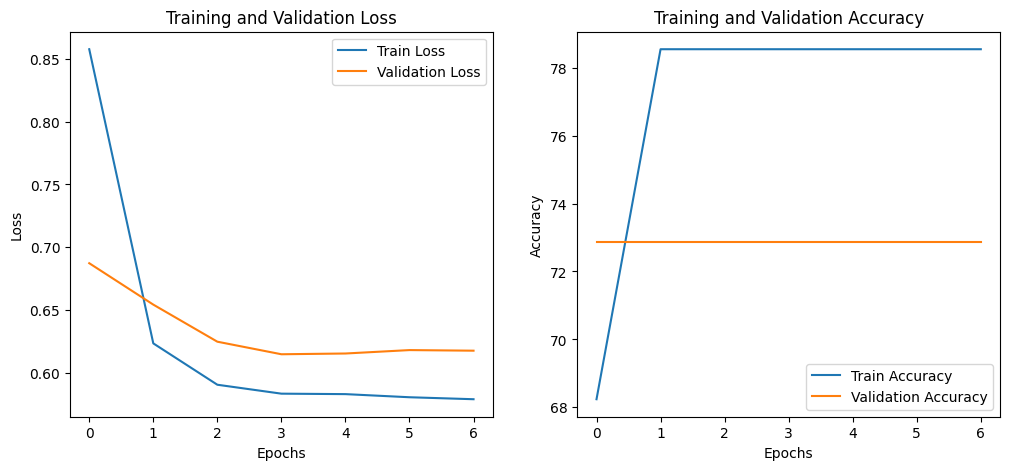

In [48]:
# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()